## Titanic Survival Prediction

TITANIC SURVIVAL PREDICTION
Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

Dataset link "https://www.kaggle.com/datasets/yasserh/titanic-dataset"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

In [2]:
titanicdataset=pd.read_csv('titanic_data.csv')

In [3]:
titanicdataset.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
titanicdataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
print(titanicdataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print(titanicdataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


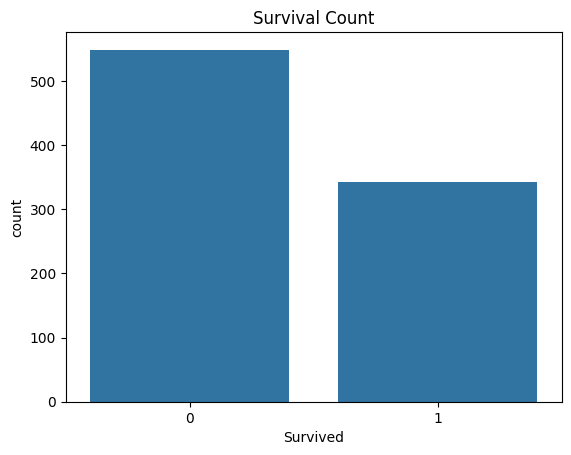

In [7]:
sns.countplot(x='Survived', data=titanicdataset)
plt.title('Survival Count')
plt.show()

In [8]:
titanicdataset['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

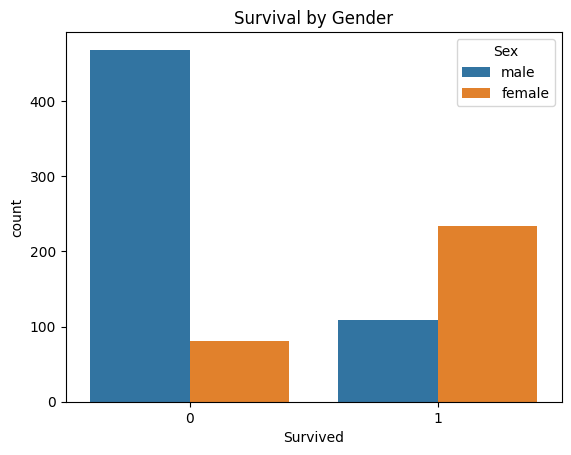

In [9]:
sns.countplot(x='Survived', hue='Sex', data=titanicdataset)
plt.title('Survival by Gender')
plt.show()

In [10]:
titanicdataset["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

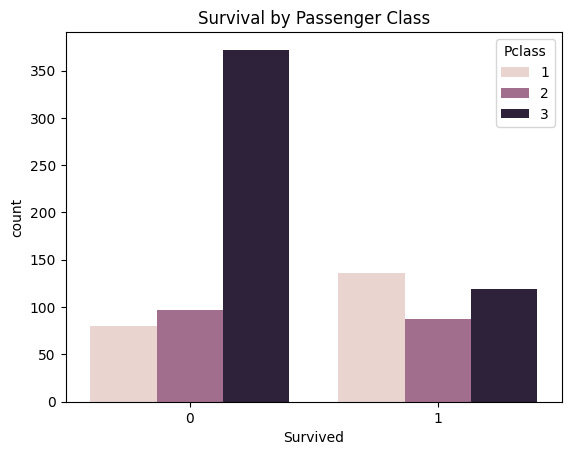

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=titanicdataset)
plt.title('Survival by Passenger Class')
plt.show()

In [12]:
imputer = SimpleImputer(strategy='median')
titanicdataset['Age'] = imputer.fit_transform(titanicdataset[['Age']])

In [13]:
titanicdataset['Embarked'].fillna(titanicdataset['Embarked'].mode()[0], inplace=True)

In [14]:
titanicdataset.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

In [15]:
label_encoder = LabelEncoder()
titanicdataset['Sex'] = label_encoder.fit_transform(titanicdataset['Sex'])  # 0 for female, 1 for male
titanicdataset['Embarked'] = label_encoder.fit_transform(titanicdataset['Embarked'])

In [16]:
print(titanicdataset.count())

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    891
dtype: int64


In [17]:
# Define features (X) and target (y)
X = titanicdataset.drop('Survived', axis=1)  # Features
y = titanicdataset['Survived']               # Target variable

In [18]:
print(X.head())
print(" ")
print(y.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2
 
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [19]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of training and testing sets
print(f'Training data shape: {x_train.shape}')
print(f'Testing data shape: {x_test.shape}')

Training data shape: (712, 7)
Testing data shape: (179, 7)


In [20]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=200)

# Train the model with training data
model.fit(x_train, y_train)

# Display model coefficients
print(f'Model Coefficients: {model.coef_}')

Model Coefficients: [[-9.30679340e-01 -2.59699589e+00 -3.04331491e-02 -2.93906310e-01
  -1.11849402e-01  2.53416249e-03 -2.18777744e-01]]


Accuracy: 0.81
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



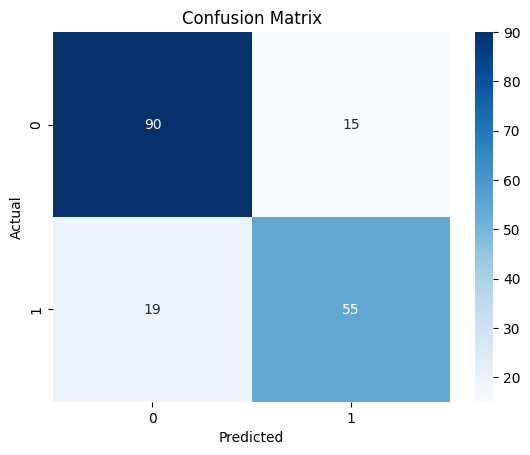

In [21]:
# Predict using the test data
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [22]:
# Print predictions for the first 10 passengers in the test set
print("Predictions for first 10 passengers:", y_pred[:10])

Predictions for first 10 passengers: [0 0 0 1 1 1 1 0 1 1]


In [23]:
new_passenger = pd.DataFrame({
    'Pclass': [3],
    'Sex': [0],  # male
    'Age': [26],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [7.925],
    'Embarked': [1]  # Southampton
})

# Make prediction for the new passenger
new_prediction = model.predict(new_passenger)
print("Prediction for the new passenger:", new_prediction)

Prediction for the new passenger: [1]
